In [1]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import umap

/home/steinre/anaconda3/envs/seissavanna_v2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Read the data

In [3]:
# READ THE STATIONS AND SPECIES/LABELS FROM THE DATASET
with xr.open_dataset('../data/scattering_coefficients_32_32.nc') as dset:
    scat_coef_map = dset['scat_coef_1'].mean(dim='comp')
    scat_coef_map /= scat_coef_map.max(dim=('frequency_0','frequency_1'))
    species_labels = dset['species'].to_numpy()
    station_labels = dset['station'].to_numpy()
    distance_labels = dset['distance'].to_numpy()

with xr.open_dataset('../data/modified_dataset.nc') as dset:
    signal_energy = dset['signal_energy'].mean(dim='comp').to_numpy()

features = scat_coef_map.data.reshape(scat_coef_map.shape[0], -1)

### Atlases with varying n neighbors

In [4]:
atlases = list()
n_neighbors_list = [10,20,30,40,50,100]

for n_neighbors in n_neighbors_list:

    print(n_neighbors)

    umap_model = umap.UMAP(
        n_components=2,
        n_neighbors=n_neighbors,
        random_state=42
        )
    
    atlases.append(umap_model.fit_transform(features))

10


/home/steinre/anaconda3/envs/seissavanna_v2/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


20


/home/steinre/anaconda3/envs/seissavanna_v2/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


30


/home/steinre/anaconda3/envs/seissavanna_v2/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


40


/home/steinre/anaconda3/envs/seissavanna_v2/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


50


/home/steinre/anaconda3/envs/seissavanna_v2/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


100


/home/steinre/anaconda3/envs/seissavanna_v2/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


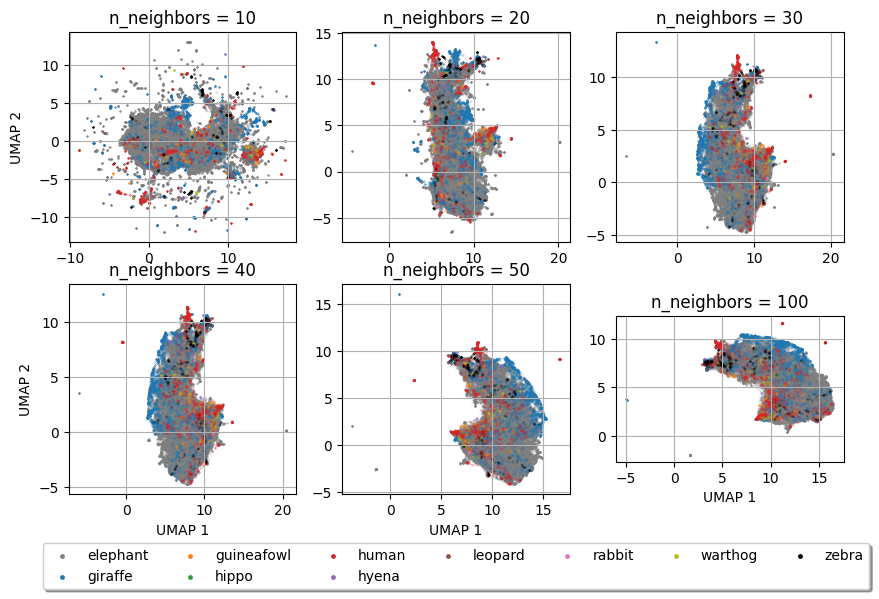

In [5]:
fig, axes = plt.subplots(2,len(n_neighbors_list) // 2,figsize=(10,6))
color_list = ['C7', 'C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C8','k']

alpha= 0.5
s = 0.1

for iAtlas, (ax, atlas) in enumerate(zip(axes.reshape(-1),atlases)):

    ax.set_title('n_neighbors = %d' % n_neighbors_list[iAtlas])

    for j,species_name in enumerate(np.unique(species_labels)):
        where = species_name == species_labels
        ax.scatter(atlas[where,0],atlas[where,1],s=s,alpha=alpha,label=species_name,c=color_list[j])
        ax.grid(True)

ax.set_aspect('equal')

axes[-1][0].set_xlabel('UMAP 1')
axes[-1][1].set_xlabel('UMAP 1')
axes[-1][2].set_xlabel('UMAP 1')

axes[0][0].set_ylabel('UMAP 2')
axes[1][0].set_ylabel('UMAP 2')


lgnd = axes[-1][1].legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.2),
    fancybox=True,
    shadow=True,
    ncol=7
    )

for handle in lgnd.legend_handles:
    handle.set_sizes([6.0])
    handle.set_alpha(1)

### Impact of minimum distance in UMAP

In [6]:
atlases = list()
min_distances = [0.1, 0.2, 0.3, 0.4, 0.5, 0.9]

for min_distance in min_distances:

    print(min_distance)

    umap_model = umap.UMAP(
        n_components=2,
        min_dist=min_distance,
        n_neighbors = 30,
        random_state=42
        )
    
    atlases.append(umap_model.fit_transform(features))

0.1


/home/steinre/anaconda3/envs/seissavanna_v2/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


0.2


/home/steinre/anaconda3/envs/seissavanna_v2/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


0.3


/home/steinre/anaconda3/envs/seissavanna_v2/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


0.4


/home/steinre/anaconda3/envs/seissavanna_v2/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


0.5


/home/steinre/anaconda3/envs/seissavanna_v2/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


0.9


/home/steinre/anaconda3/envs/seissavanna_v2/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


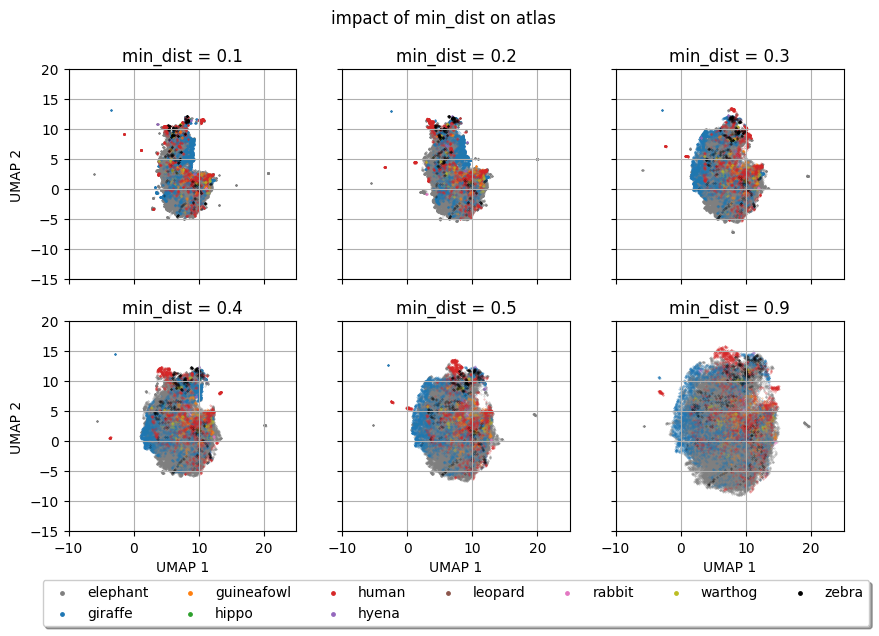

In [7]:
fig, axes = plt.subplots(2,len(n_neighbors_list) // 2,figsize=(10,6),sharex=True,sharey=True)
fig.suptitle('impact of min_dist on atlas')

alpha= 0.5
s = 0.1

for iAtlas, (ax, atlas) in enumerate(zip(axes.reshape(-1),atlases)):

    ax.set_title('min_dist = %.1f' % min_distances[iAtlas])

    for j,species_name in enumerate(np.unique(species_labels)):
        where = species_name == species_labels
        ax.scatter(atlas[where,0],atlas[where,1],s=s,alpha=alpha,label=species_name,c=color_list[j])
        ax.grid(True)

ax.set_xlim(-10,25)
ax.set_ylim(-15,20)

axes[-1][0].set_xlabel('UMAP 1')
axes[-1][1].set_xlabel('UMAP 1')
axes[-1][2].set_xlabel('UMAP 1')

axes[0][0].set_ylabel('UMAP 2')
axes[1][0].set_ylabel('UMAP 2')


lgnd = axes[-1][1].legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.2),
    fancybox=True,
    shadow=True,
    ncol=7
    )

for handle in lgnd.legend_handles:
    handle.set_sizes([6.0])
    handle.set_alpha(1)